In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from syntactic_complexity import analyze_text

* This sample data (every tenth word) is taken from the one billion word "Web/Dialects" portion of t


In [3]:
initial = analyze_text("Logo após sair da aula, Bianca teve um encontro com Arthur.")
initial

{'MLC': 15.0,
 'MLS': 15.0,
 'DCC': 1.0,
 'CPC': 0.0,
 'profundidade_media': 3.0,
 'profundidade_max': 3,
 'ttr': 1.1538461538461537,
 'lexical_density': 0.3333333333333333,
 'lexical_sophistication': 1.0,
 'text': 'Logo após sair da aula, Bianca teve um encontro com Arthur.'}

In [4]:
humans = pd.read_json("all_redacoes.json",lines=True)
humans

,author_data,redacao,year,tema
0,Alice Souza 18 anos | Feira de Santana - BA | ...,"A Constituição Federal, promulgada em 1988, fo...",2021,Invisibilidade e registro civil: garantia de a...
1,Andressa Nunes 20 anos | Rio de Janeiro - RJ |...,"Graciliano Ramos, em sua obra literária ""Vidas...",2021,Invisibilidade e registro civil: garantia de a...
2,Beatriz Valentini 19 anos | São Paulo - SP,"Durante a ascensão do nazismo, os judeus foram...",2021,Invisibilidade e registro civil: garantia de a...
3,Daiane Souza 20 anos | Limoeiro - PE | @daiane...,"A obra modernista ""Vidas Secas"", produzida por...",2021,Invisibilidade e registro civil: garantia de a...
4,Emily Moraes 19 anos | Curitiba - PR | @emilym...,"No documentário ""A cidadania é para todos"", di...",2021,Invisibilidade e registro civil: garantia de a...
...,...,...,...,...
112,Raíssa Fontoura 20 anos | São Paulo - SP | @ra...,"De acordo com o ﬁlósofo Platão, a associação e...",2020,O estigma associado às doenças mentais na soci...
113,Ramon Ribeiro 15 anos | Macaúbas - BA | @ramon...,"Promulgada pela ONU em 1948, a Declaração Univ...",2020,O estigma associado às doenças mentais na soci...
114,Soﬁa Vale 19 anos | Belém - PA | @soﬁa_lv,"No livro ""O papel de parede amarelo"", é narrad...",2020,O estigma associado às doenças mentais na soci...
115,Savicevic Ortega 20 anos | Recife - PE | @savi...,A segunda fase do Modernismo brasileiro teve a...,2020,O desafio de reduzir as desigualdades entre as...


In [ ]:
humans = humans[humans["year"] == 2019]
humans.head()

In [6]:
data = []
for redacao in humans["redacao"]:
    row = analyze_text(redacao)
    data.append(row)

In [7]:
df = pd.DataFrame(data)
df["type"] = "human"
df.head()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,lexical_density,lexical_sophistication,text,type
0,17.351351,40.125000,0.702703,0.513514,6.500000,12,0.463972,0.356698,0.918367,"Ao longo do processo de formação da sociedade,...",human
1,14.560976,39.800000,0.536585,0.463415,6.533333,8,0.486891,0.371859,1.000000,A Constituição brasileira de 1988 assegura a t...,human
2,19.896552,48.083333,0.689655,1.586207,6.166667,10,0.501961,0.398614,0.878049,"A construção dos feudos, muros que delimitavam...",human
3,16.272727,48.818182,0.515152,0.727273,7.090909,11,0.491770,0.353818,0.941176,Embora a Constituição Federal de 1988 assegure...,human
4,21.241379,41.066667,0.689655,1.000000,6.000000,9,0.436396,0.349026,0.955556,"Na obra ""Brasil: uma biograﬁa"", as historiador...",human


In [8]:
data = []
directory = "Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo"
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)

    with open(file_path, "r") as file:
        row = analyze_text(file.read())
        data.append(row)

In [9]:
machine = pd.DataFrame(data)
machine["type"] = "LLM"
machine.head()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,lexical_density,lexical_sophistication,text,type
0,14.527778,47.545455,0.750000,1.333333,7.454545,13,0.454545,0.397706,0.902439,"No Brasil, a invisibilidade do trabalho de cui...",LLM
1,15.157895,48.000000,0.657895,1.473684,8.250000,12,0.452514,0.394097,0.958333,A invisibilidade do trabalho de cuidado realiz...,LLM
2,16.468750,40.538462,0.718750,1.593750,6.692308,10,0.466387,0.407970,0.930233,A invisibilidade do trabalho de cuidado realiz...,LLM
3,16.916667,40.600000,0.750000,1.250000,7.733333,10,0.370175,0.385878,0.938776,"Com base em sua solicitação, segue a redação m...",LLM
4,12.439024,42.500000,0.609756,0.902439,7.916667,10,0.459916,0.380392,0.955556,É inegável que a invisibilidade do trabalho de...,LLM


In [10]:
df = pd.concat([df,machine])

In [11]:
df.sample(5).head()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,lexical_density,lexical_sophistication,text,type
14,18.694444,42.062500,0.638889,0.805556,6.187500,9,0.468852,0.378900,0.957447,"Durante a primeira metade do século XX, as obr...",human
23,16.750000,33.500000,0.428571,0.464286,5.642857,12,0.478365,0.366738,0.885714,A Constituição Federal de 1988 ― norma de maio...,human
34,16.439024,48.142857,0.609756,0.756098,8.642857,19,0.445364,0.370920,0.916667,A partir do avanço do desenvolvimento das gran...,human
35,19.583333,39.166667,0.625000,0.666667,5.500000,8,0.502463,0.365957,0.843750,O poeta Sebastião Uchoa Leite já mencionou que...,human
40,13.842105,43.833333,0.473684,0.526316,6.750000,12,0.468951,0.363118,0.937500,"A questão do acesso ao cinema, apesar de não s...",human


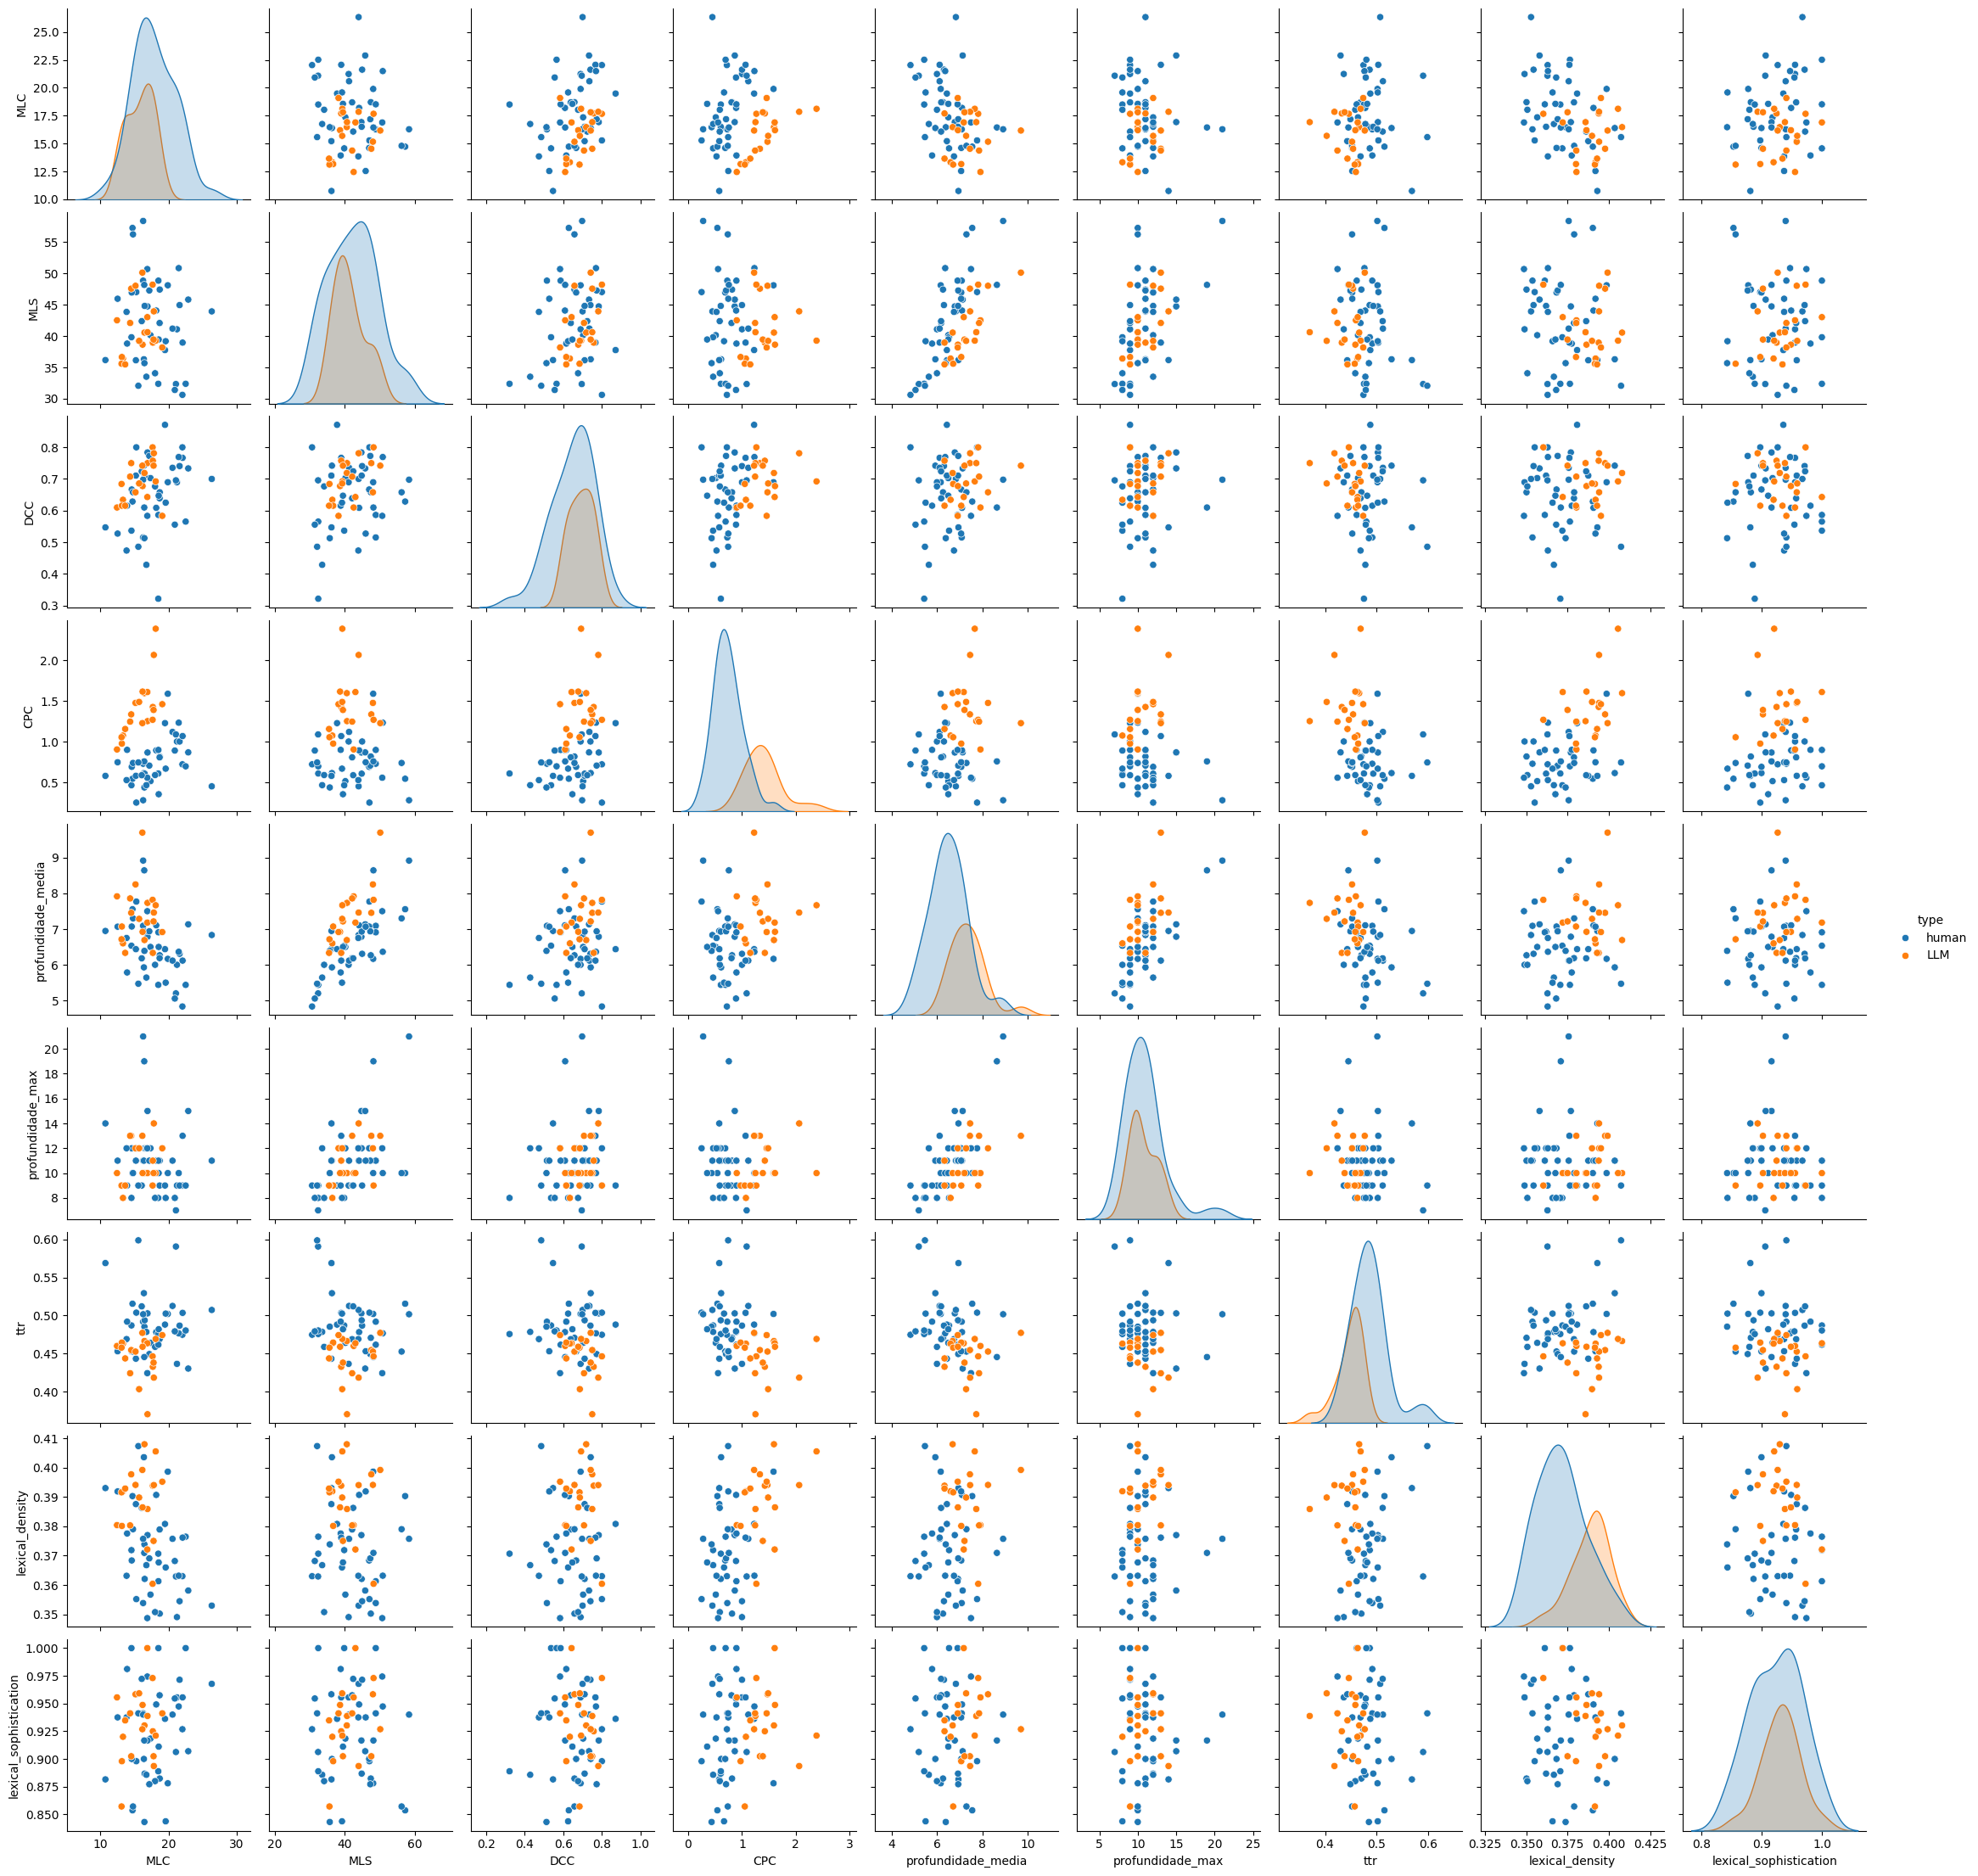

In [12]:
sns.pairplot(df,hue="type")

In [13]:
from scipy.stats import ttest_ind
from scipy.stats import anderson


grouped_data = df.groupby('type')

group1 = grouped_data.get_group("human")
group2 = grouped_data.get_group("LLM")

ttest_results = {
    'Feature': [],
    'T-Statistic': [],
    'P-Value': [],
    'Significant': [],
    'Normality': []
}
for column in df.select_dtypes(include='number').columns:
    # Extract the data for each group for the current column
    data1 = group1[column]
    data2 = group2[column]
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(data1, data2)
    
    # Determine if the result is significant (p-value < 0.05)
    significant = p_value < 0.05

    normal = anderson(data1, 'norm').statistic < 0.05
    
    # Store the results in the dictionary
    ttest_results['Feature'].append(column)
    ttest_results['T-Statistic'].append(t_stat)
    ttest_results['P-Value'].append(p_value)
    ttest_results['Significant'].append(significant)
    ttest_results['Normality'].append(normal)

In [14]:
results_df = pd.DataFrame(ttest_results)
results_df.sort_values(by = 'Significant',inplace=True)
results_df

,Feature,T-Statistic,P-Value,Significant,Normality
1,MLS,0.583535,5.616498e-01,False,False
2,DCC,-1.667353,1.004882e-01,False,False
5,profundidade_max,0.281883,7.789722e-01,False,False
8,lexical_sophistication,-0.649416,5.184681e-01,False,False
0,MLC,2.689951,9.170282e-03,True,False
3,CPC,-8.263034,1.385131e-11,True,False
4,profundidade_media,-3.825972,3.052655e-04,True,False
6,ttr,4.276884,6.667126e-05,True,False
7,lexical_density,-4.582261,2.277479e-05,True,False


In [15]:
significant_ones = results_df[results_df["Significant"]== True]
significant_ones

,Feature,T-Statistic,P-Value,Significant,Normality
0,MLC,2.689951,9.170282e-03,True,False
3,CPC,-8.263034,1.385131e-11,True,False
4,profundidade_media,-3.825972,3.052655e-04,True,False
6,ttr,4.276884,6.667126e-05,True,False
7,lexical_density,-4.582261,2.277479e-05,True,False


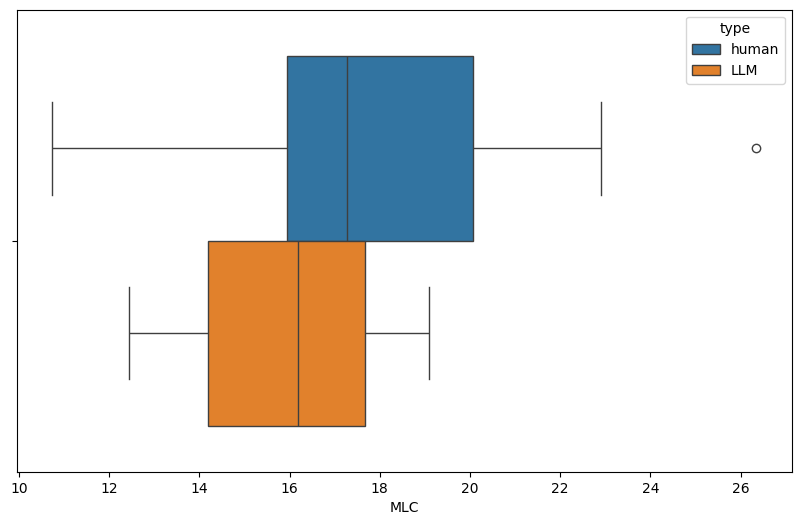

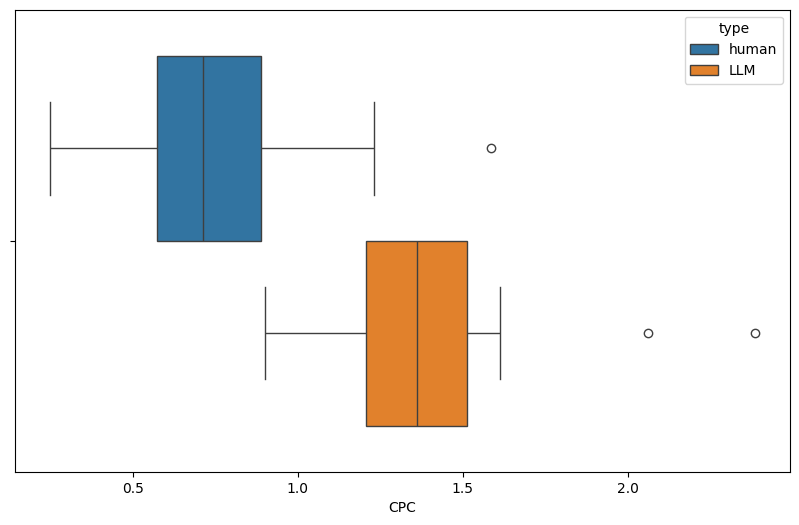

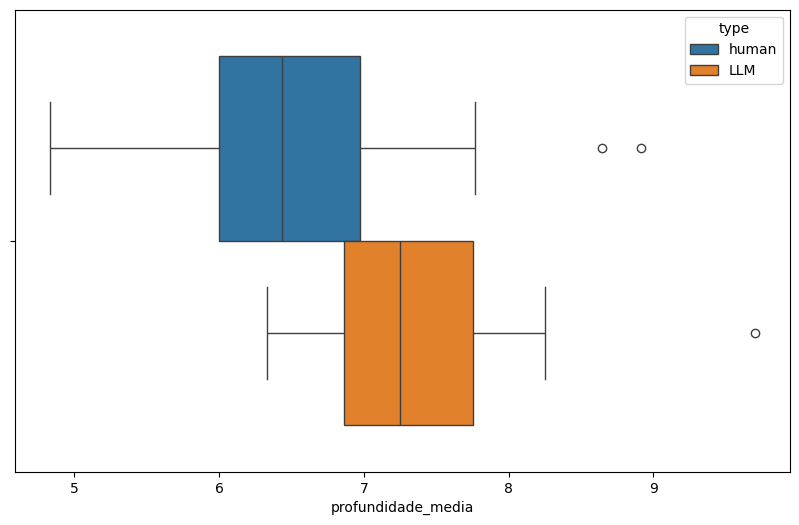

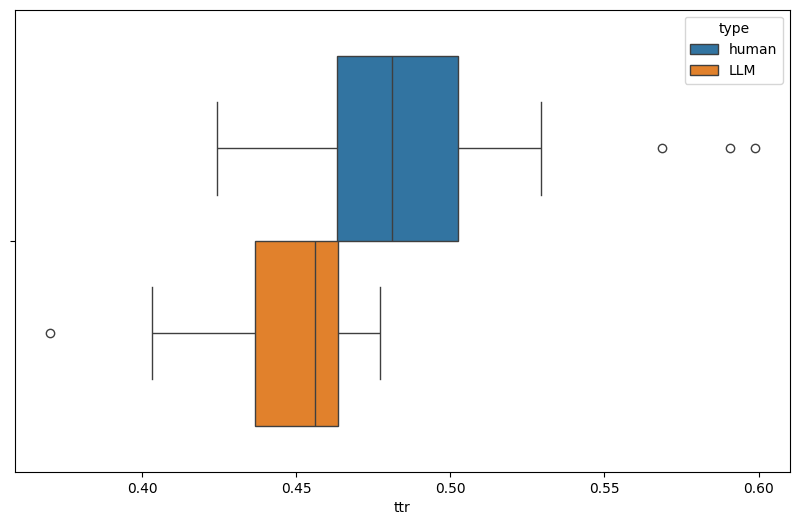

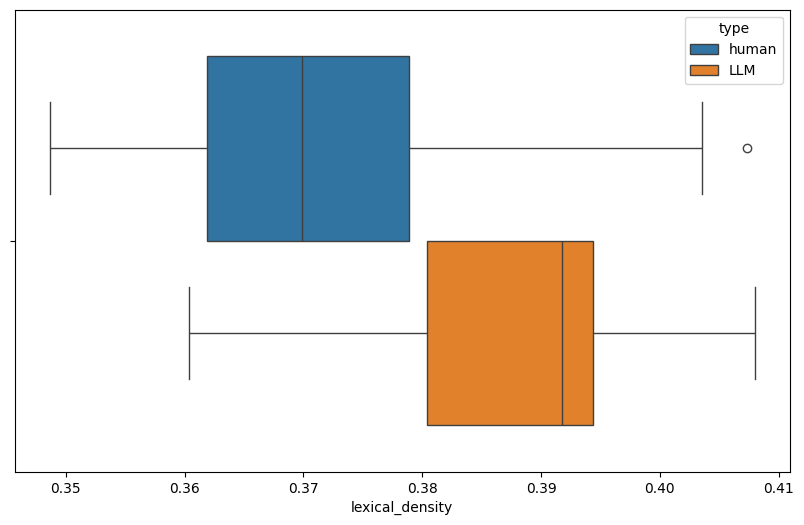

In [17]:
for feature in significant_ones["Feature"]: 
    plt.figure(figsize=(10, 6))  # Set figure size
    ax = sns.boxplot(data=df, hue="type", x=feature)
    plt.show()

In [18]:
df.groupby("type").count()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,lexical_density,lexical_sophistication,text
type,,,,,,,,,,
LLM,20,20,20,20,20,20,20,20,20,20
human,44,44,44,44,44,44,44,44,44,44


In [19]:
features = df[significant_ones["Feature"]]
features["type"] = df["type"]

/tmp/ipykernel_1436/2082278377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["type"] = df["type"]


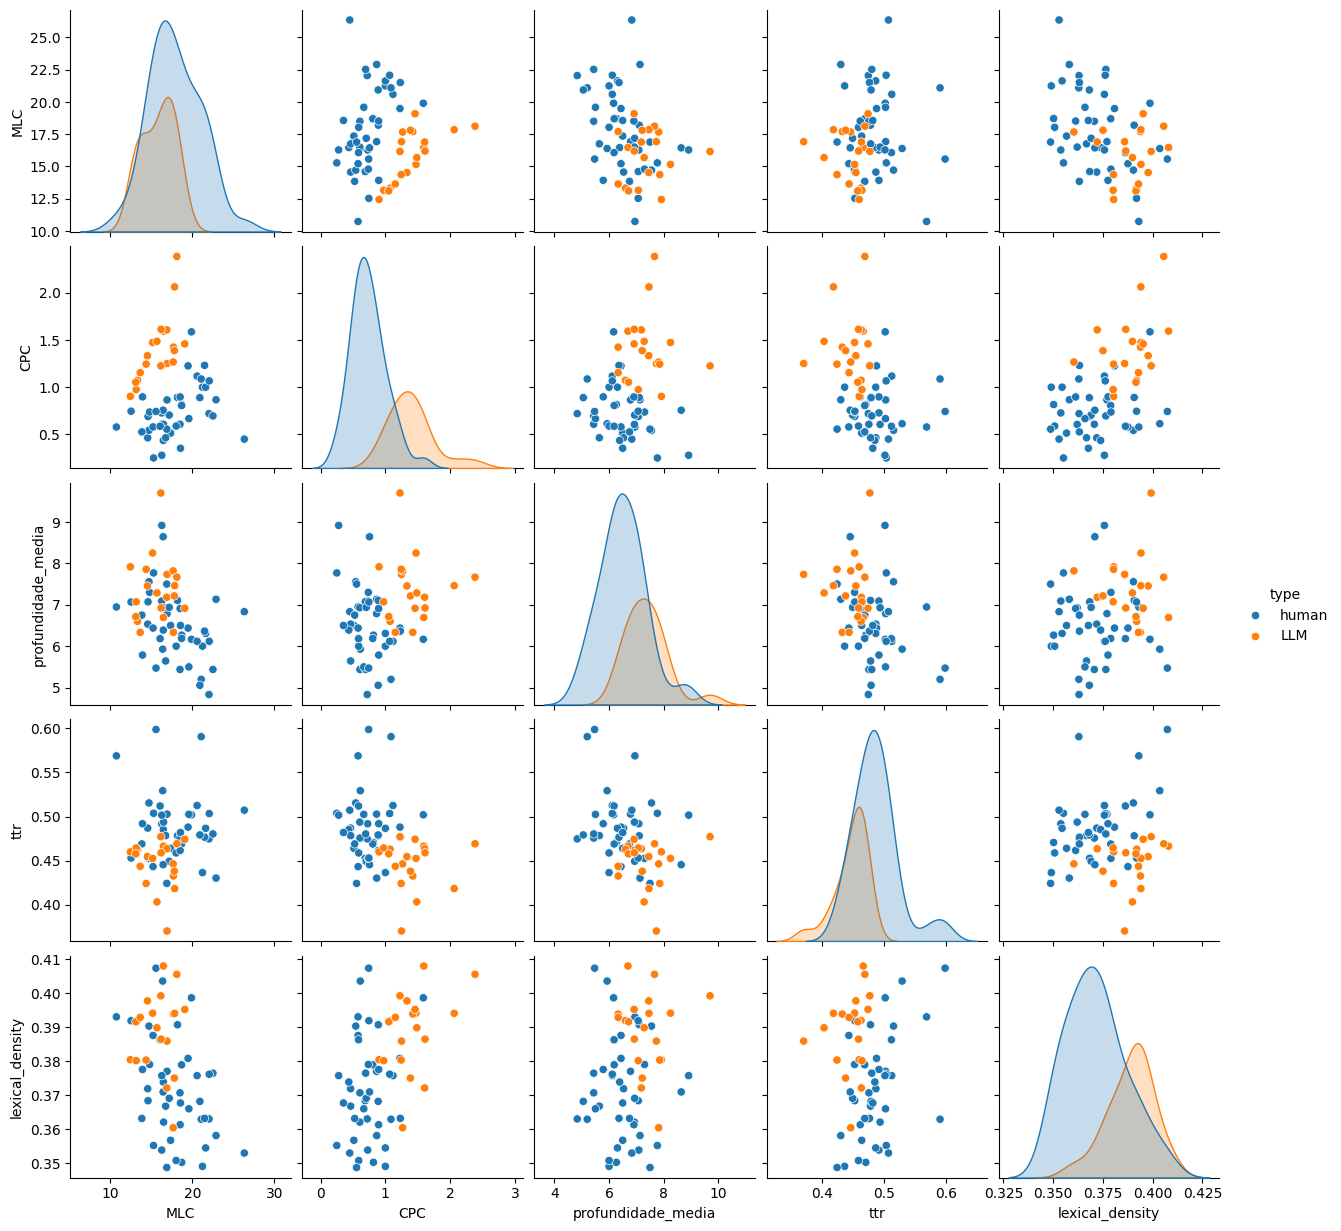

In [20]:
sns.pairplot(features,hue="type")
plt.show()

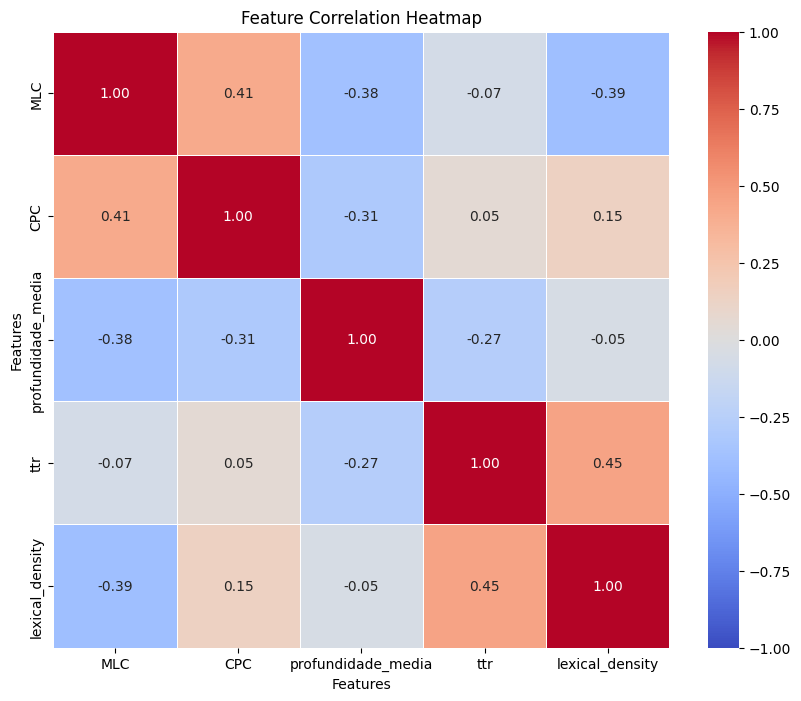

In [31]:
humans = df[df["type"] == "human"][significant_ones["Feature"]]
corr_matrix = humans.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True,vmin=-1, vmax=1)

# Add title and labels
plt.title('Feature Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the heatmap
plt.show()

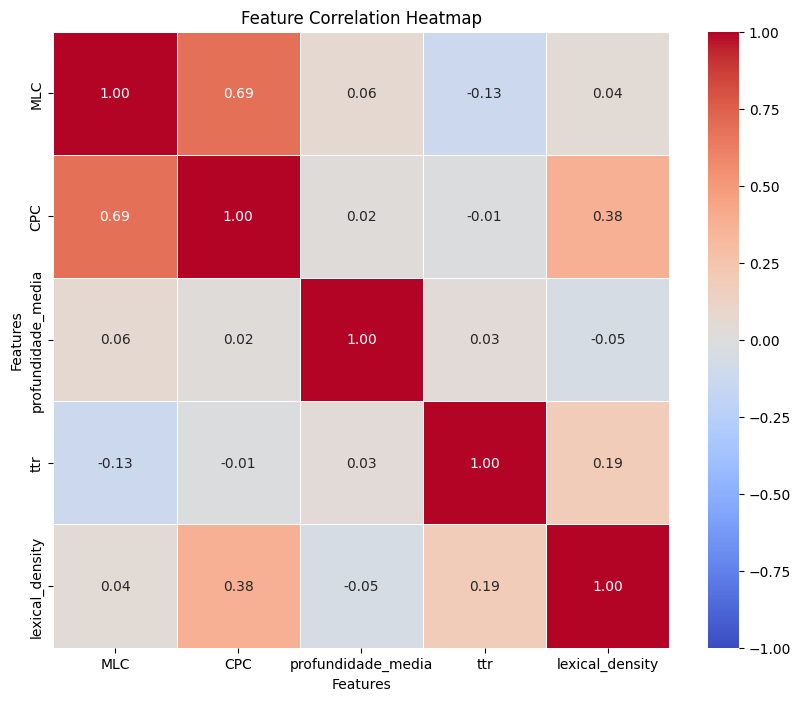

In [32]:
humans = df[df["type"] != "human"][significant_ones["Feature"]]
corr_matrix = humans.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True,vmin=-1, vmax=1)

# Add title and labels
plt.title('Feature Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the heatmap
plt.show()